<h1> APRENDIZAJE NO SUPERVIZADO DATA SET 1<h1>
<h1> ALUMNO: Loaiza Coronado Rodrigo Jairo <h1>
<h1> Carrera: Ing. de Sistemas <h1>


In [1]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from google.colab import drive



In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

EL DATA SET RESIBIDO TRATA SOBRE PREDECIR EL PRECIO DE UNA VIVIENDA, LOS PRECIOS DE LAS CASAS SON DESDE 10 MIL HASTA 100MIL

In [4]:
data = pd.read_csv('/content/drive/MyDrive/SIS420 Inteligencia Artificial/machine learning/datasets/Prices house.csv', delimiter=",")
data

,Size,Number of rooms,Location,Distance of the center,Years of construction,Date,Country,Build quality,Price final
0,0.935726,0.921034,0.050417,0.173085,0.139500,12/09/1995,Ghana,7,643428
1,0.945854,0.084170,0.211671,0.080723,0.980385,17/06/2015,Christmas Island,4,939085
2,0.425973,0.190178,0.221490,0.443040,0.768223,22/10/2001,Cocos (Keeling) Islands,8,149126
3,0.599944,0.237729,0.584219,0.387131,0.034368,05/04/2008,South Georgia and the South Sandwich Islands,5,951468
4,0.293112,0.322832,0.065941,0.615047,0.849242,15/12/1997,Niger,7,357705
...,...,...,...,...,...,...,...,...,...
19995,0.233252,0.767280,0.617955,0.872762,0.395947,03/07/2017,Serbia,6,323517
19996,0.761047,0.412396,0.923288,0.944881,0.958778,12/04/2023,Saint Martin,6,733778
19997,0.831551,0.199999,0.744946,0.971285,0.388012,16/04/2000,Cambodia,2,114595
19998,0.839408,0.216327,0.528366,0.412535,0.009789,11/09/2017,New Caledonia,6,954607


EN EL DATA SET EXISTEN COLUMNAS QUE SON IRRELEVANTES COMO LA COLUMNA DE DATO, ENTONCES PROCEDEMOS A ELIMINAR Y REGULARIZAR LAS COLUMNAS QUE SON STRINGS EN VALORES ENTEROS. LA COLUMNA COUNTRY SON DATOS DE TIPO STRING, ENTONCES USAMOS LABEL ENCONDER PARA TRANSFORMAR EN VALORES ENTEROS


In [5]:
from sklearn.preprocessing import LabelEncoder
# eliminar la primer fila
data = data.drop(['Date',], axis=1)
# Convertir características categóricas en variables numéricas usando codificación de etiquetas
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])

In [6]:
data

,Size,Number of rooms,Location,Distance of the center,Years of construction,Country,Build quality,Price final
0,0.935726,0.921034,0.050417,0.173085,0.139500,80,7,643428
1,0.945854,0.084170,0.211671,0.080723,0.980385,45,4,939085
2,0.425973,0.190178,0.221490,0.443040,0.768223,46,8,149126
3,0.599944,0.237729,0.584219,0.387131,0.034368,202,5,951468
4,0.293112,0.322832,0.065941,0.615047,0.849242,156,7,357705
...,...,...,...,...,...,...,...,...
19995,0.233252,0.767280,0.617955,0.872762,0.395947,193,6,323517
19996,0.761047,0.412396,0.923288,0.944881,0.958778,185,6,733778
19997,0.831551,0.199999,0.744946,0.971285,0.388012,36,2,114595
19998,0.839408,0.216327,0.528366,0.412535,0.009789,153,6,954607


NORMALIZAMOS LOS DATOS

In [7]:
from sklearn.preprocessing import StandardScaler
# Paso 3: Normalización de características
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

In [8]:
scaled_data


array([[ 1.50615699,  1.44861168, -1.56101962, ..., -0.57883456,
         0.51872664,  0.35664095],
       [ 1.54125638, -1.44242894, -1.00298072, ..., -1.07940124,
        -0.52111828,  1.49161135],
       [-0.26048619, -1.07621342, -0.9690012 , ..., -1.06509933,
         0.86534161, -1.54088943],
       ...,
       [ 1.14511983, -1.04228715,  0.84248556, ..., -1.20811838,
        -1.21434823, -1.6734473 ],
       [ 1.17235109, -0.98587992,  0.0929826 , ...,  0.4652045 ,
         0.17211166,  1.55119733],
       [ 1.53710599,  1.11280446,  1.05290424, ...,  0.15056259,
         0.17211166, -1.00566365]])

USAMOS EL METODO DE LA SILUETA PARA ENCONTRAR EL NUMERO OPTIMO DE CLUSTERS. SE ESTA REALIZANODO SOLAMENTE 50 ITERACIONES POR CUESTIONES DE TIEMPO Y PROCESAMIENTO. SERIA ADECUADO REALIZAR MUCHAS MAS ITERACIONES POR LOS DATOS DEL DATA SET YA QUE A SIMPLE VISTA NO SE LOGRA IDENTIFICAR ALGUN NUMERO DE AGRUPAMIENTO ENTRE SUS DATOS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

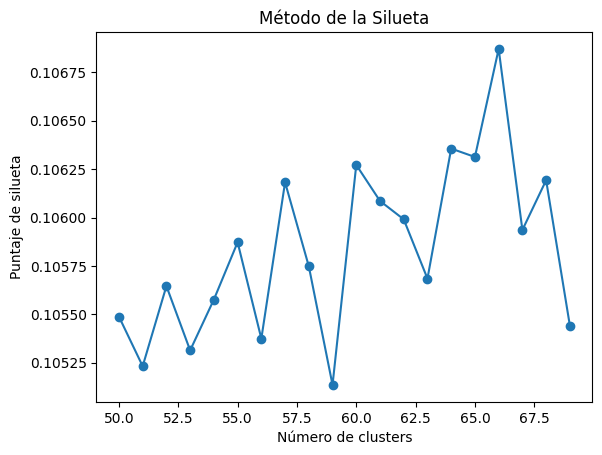

El número óptimo de clusters según la puntuación de silueta es: 66


In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Método de la silueta
silueta_scores = []
for k in range(50, 70):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    silueta_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.plot(range(50, 70), silueta_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Puntaje de silueta')
plt.title('Método de la Silueta')
plt.show()
best_silhouette_index = np.argmax(silueta_scores)
best_num_clusters = best_silhouette_index + 50  # Sumamos 50 ya que comenzamos desde 2 clusters
print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)

In [11]:
from sklearn.model_selection import train_test_split

# Separar los datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_data
X_test = test_data

print('-' * 80)
print(f"El 80% de ejemplos que serán para el entrenamiento son: {len(X_train)}")
print(f"El 20% de ejemplos que serán para el prueba son: {len(X_test)}")

--------------------------------------------------------------------------------
El 80% de ejemplos que serán para el entrenamiento son: 16000
El 20% de ejemplos que serán para el prueba son: 4000


In [12]:
# Normalizar los datos
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [13]:
X_train_

array([[-0.72713175, -1.16984262, -0.82620722, ...,  0.33809918,
         1.21081291, -0.19522413],
       [ 1.60156077, -0.64416036, -1.3017424 , ..., -0.96266711,
        -1.5591337 ,  0.98753903],
       [-1.55680964,  0.13897992, -0.74274803, ..., -0.74825509,
         1.55705624,  1.27624907],
       ...,
       [ 1.22865833,  0.59907279, -0.62362983, ..., -1.42007943,
        -0.17416039,  0.89663032],
       [ 0.44087748, -1.2508312 , -1.59328898, ...,  1.02421766,
        -1.21289037,  0.66172089],
       [-0.20761465,  1.56943874,  0.99272292, ...,  1.31010036,
         1.55705624,  1.58144861]])

aPLICAMOS EL ALGORITMO KAMINS A CON NUESTRO MEJOR NUMERO DE CLUSTERS, X_TRAIN_ YA ESTA PREPRCESADO Y NORMALIZADO.
AGRGAMOS UNA COLUMNA DE KMEANS3 PARA LLENAR CON EL NUMERO DE CLUSTER AL QUE PERTENECE

In [14]:
# KMeans clustering on training data
kmeans = KMeans(n_clusters=best_num_clusters, n_init=10, random_state=42)
kmeans.fit(X_train_)
train_data['kmeans3'] = kmeans.labels_

# Este método ajusta el modelo K-Means utilizando el conjunto de datos X_train y
# Transformamos los datos de entrenamiento en distancias euclidianas a los centroides
X_digits_dist = kmeans.transform(X_train_)

In [15]:
# Mostramos el número de ejemplos en cada grupo.
print(X_digits_dist.shape)
print(X_digits_dist)

(16000, 49)
[[2.47675814 3.84983902 4.25747937 ... 3.53756186 2.25705717 3.22549641]
 [4.68603004 4.404529   3.45127799 ... 3.37686561 3.89471809 4.70634527]
 [3.6317533  3.86580868 4.67195582 ... 4.14387952 3.61901722 3.61509165]
 ...
 [3.65032036 3.38737147 2.27059691 ... 2.2790647  3.14987732 3.37222908]
 [4.0703534  4.19089267 4.47785303 ... 4.22575538 3.93694532 4.52681223]
 [4.21740342 5.10659808 3.89804477 ... 3.72525684 4.41790101 3.1360345 ]]


SACAR EL COEFICIENTE DE SILUETA PROMEDIO ES UNA BUENA FORMA DE EXAMINAR LA PRESISION DEL ALGORITMO LO QUE HACE ES SACARA UN PROMEDIO ENTRE LAS DISTANCIAS DE LOS DATOS A SUS CLUSTER.
ENTRE MAS CERCANO ESTEN LOS DATOS DE SUS CLUSTERS MEJOR SERA EL RESULTADO

In [16]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta para tus datos de entrenamiento
silhouette_avg = silhouette_score(X_train_, kmeans.labels_)
print("Coeficiente de silueta promedio:", silhouette_avg)


Coeficiente de silueta promedio: 0.10476258485931868


EN ESTA 2DA PARTE DEL CODIGO PROBAREMOS EL DATA SET SIN LA COLUMNA DE Y QUE POSIBLEMENTE ESTE INFLUYENDO EN NUESTRO RESULTADO.


In [17]:
data_none_y = data
data_none_y = data_none_y.drop(['Price final',], axis=1)
data_none_y

,Size,Number of rooms,Location,Distance of the center,Years of construction,Country,Build quality
0,0.935726,0.921034,0.050417,0.173085,0.139500,80,7
1,0.945854,0.084170,0.211671,0.080723,0.980385,45,4
2,0.425973,0.190178,0.221490,0.443040,0.768223,46,8
3,0.599944,0.237729,0.584219,0.387131,0.034368,202,5
4,0.293112,0.322832,0.065941,0.615047,0.849242,156,7
...,...,...,...,...,...,...,...
19995,0.233252,0.767280,0.617955,0.872762,0.395947,193,6
19996,0.761047,0.412396,0.923288,0.944881,0.958778,185,6
19997,0.831551,0.199999,0.744946,0.971285,0.388012,36,2
19998,0.839408,0.216327,0.528366,0.412535,0.009789,153,6


In [18]:
from sklearn.preprocessing import StandardScaler
# Paso 3: Normalización de características
scaler = StandardScaler()
scaled_data_none = scaler.fit_transform(data_none_y.select_dtypes(include=[np.number]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

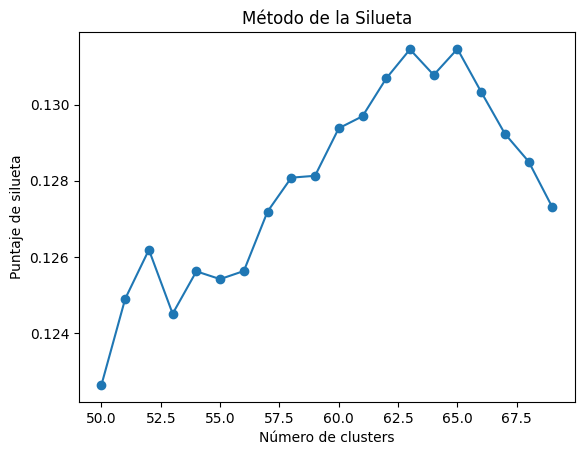

El número óptimo de clusters según la puntuación de silueta es: 65


In [19]:
# Método de la silueta
silueta_scores = []
for k in range(50, 70):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data_none)
    silueta_scores.append(silhouette_score(scaled_data_none, kmeans.labels_))

plt.plot(range(50, 70), silueta_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Puntaje de silueta')
plt.title('Método de la Silueta')
plt.show()
best_silhouette_index = np.argmax(silueta_scores)
best_num_clusters = best_silhouette_index + 50  # Sumamos 50ya que comenzamos desde 2 clusters
print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)

In [37]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(1, 10)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

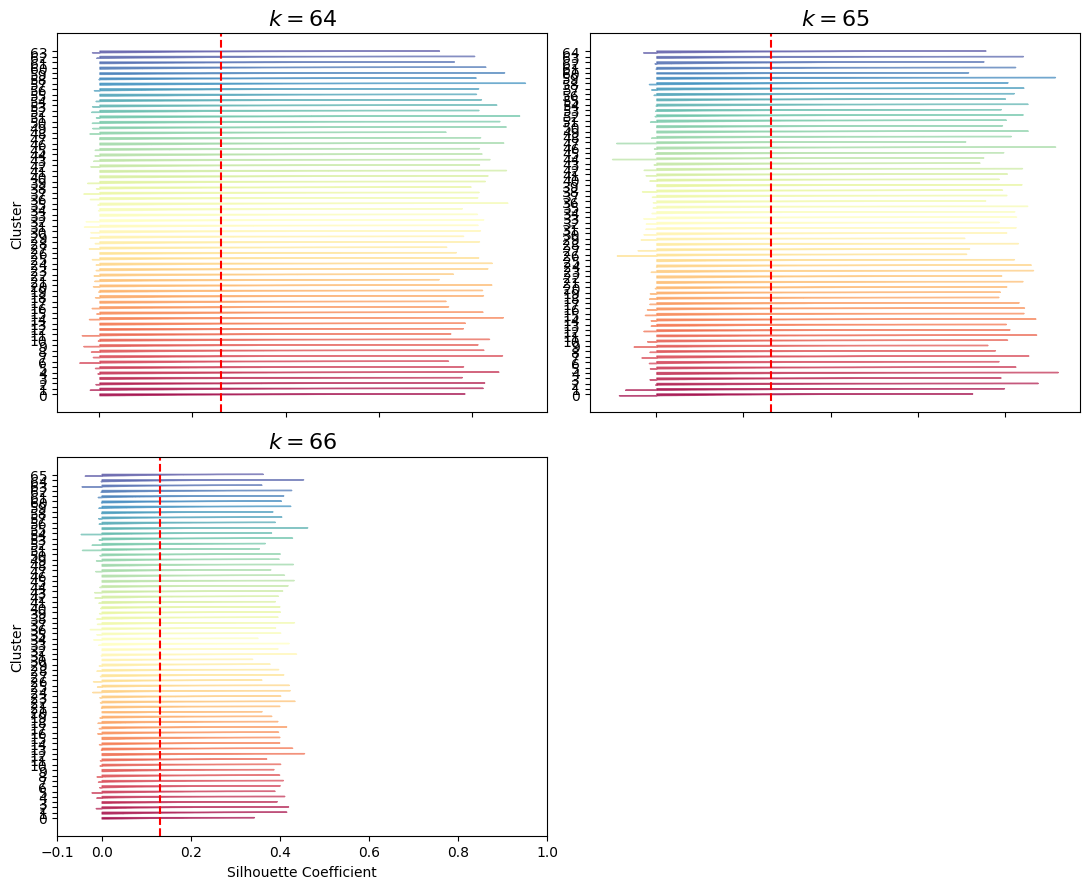

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que scaled_data_none es tu conjunto de datos escalados
# Aquí debes asegurarte de que scaled_data_none esté definido y sea el conjunto de datos correcto

# Inicializa las listas para guardar los modelos y los puntajes de silueta
kmeans_per_k = []
silhouette_scores = []

# Ajusta KMeans para cada k en [60, 61, ..., 70]
for k in range(60, 71):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data_none)
    kmeans_per_k.append(kmeans)
    y_pred = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data_none, y_pred)
    silhouette_scores.append(silhouette_avg)

# Visualiza los coeficientes de silueta
plt.figure(figsize=(11, 9))

for i, k in enumerate(range(64, 67)):
    plt.subplot(2, 2, i + 1)

    y_pred = kmeans_per_k[k - 60].labels_
    silhouette_coefficients = silhouette_samples(scaled_data_none, y_pred)

    padding = len(scaled_data_none) // 30
    pos = padding
    ticks = []
    for cluster in range(k):
        coeffs = silhouette_coefficients[y_pred == cluster]
        coeffs.sort()

        color = mpl.cm.Spectral(cluster / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if i % 2 == 0:
        plt.ylabel("Cluster")

    if i >= 2:
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 60], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()


In [20]:
from sklearn.model_selection import train_test_split

# Separar los datos en entrenamiento y prueba
train_data_none, test_data_none = train_test_split(data_none_y, test_size=0.2, random_state=42)
X_train_none = train_data_none
X_test_none = test_data_none

print('-' * 80)
print(f"El 80% de ejemplos que serán para el entrenamiento son: {len(X_train)}")
print(f"El 20% de ejemplos que serán para el prueba son: {len(X_test)}")

--------------------------------------------------------------------------------
El 80% de ejemplos que serán para el entrenamiento son: 16000
El 20% de ejemplos que serán para el prueba son: 4000


In [21]:
# Normalizar los datos
scaler = StandardScaler()
X_train_none_ = scaler.fit_transform(X_train_none)
X_test_none_ = scaler.transform(X_test_none)

In [27]:
# KMeans clustering on training data
kmeans = KMeans(n_clusters=best_num_clusters, n_init=10, random_state=42)
kmeans.fit(X_train_none_)
train_data_none['kmeans3'] = kmeans.labels_

In [28]:
train_data_none

,Size,Number of rooms,Location,Distance of the center,Years of construction,Country,Build quality,kmeans3
5894,0.291632,0.165856,0.261300,0.169986,0.757878,144,9,10
3728,0.964312,0.317827,0.123852,0.937661,0.399766,53,1,34
8958,0.051967,0.544227,0.285423,0.009805,0.619047,68,10,10
7671,0.544259,0.636131,0.015707,0.139822,0.470277,137,1,12
5999,0.250619,0.965112,0.965459,0.113353,0.705094,144,7,2
...,...,...,...,...,...,...,...,...
11284,0.799223,0.171468,0.902999,0.888295,0.888370,166,7,63
11964,0.535700,0.056834,0.707875,0.593315,0.718399,239,10,63
5390,0.856593,0.677237,0.319853,0.712707,0.468850,21,5,25
860,0.629030,0.142443,0.039584,0.701449,0.117056,192,2,3


In [22]:
# Mostramos el número de ejemplos en cada grupo.
print(X_digits_dist.shape)
print(X_digits_dist)

(16000, 49)
[[2.47675814 3.84983902 4.25747937 ... 3.53756186 2.25705717 3.22549641]
 [4.68603004 4.404529   3.45127799 ... 3.37686561 3.89471809 4.70634527]
 [3.6317533  3.86580868 4.67195582 ... 4.14387952 3.61901722 3.61509165]
 ...
 [3.65032036 3.38737147 2.27059691 ... 2.2790647  3.14987732 3.37222908]
 [4.0703534  4.19089267 4.47785303 ... 4.22575538 3.93694532 4.52681223]
 [4.21740342 5.10659808 3.89804477 ... 3.72525684 4.41790101 3.1360345 ]]


In [26]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=best_num_clusters, random_state=42)
y_pred = kmeans.fit_predict(X_train_none)
silhouette_avg = silhouette_score(X_train_none, y_pred) # Calculamos el score de silueta del modelo
print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.3456783567512509
